<!--# STAT 207: Data Science Exploration-->

# <u> Unit 12 Notebook</u>: Simple Linear Regression

## <u>Case Study</u> Mother and Daughter Height Analysis
Is there an association between a mother's height and her daughter's height?
* In the sample?
* In the population?
* Can we use predict the height of a daughter given the height of her mother?

We will explore a dataset or randomly selected pairs of mother and daughter heights.

<hr style="height:1px;border:none;color:#333;background-color:#333;" />






## **Primary modeling package: statsmodels**

To install statsmodels from the anaconda command line:

    conda install -c conda-forge statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## 1. Analyses for Association

#### See Unit 12 slides (section 1)

## 2. Association Analysis Summary
### <u>Explanatory</u>: Numerical
### <u>Response</u>: Numerical


#### See Unit 12 slides (section 2)


## 3. Basic Descriptive Analytics - Two Numerical Variables

### 3.1. Visualizations

#### See Unit 12 slides (section 3.1)







In [2]:
df = pd.read_csv('heights.txt', sep=' ')
df.head()

,Mheight,Dheight
0,59.7,55.1
1,58.2,56.5
2,60.6,56.0
3,60.7,56.8
4,61.8,56.0


In [3]:
df.shape

(1375, 2)

In [4]:
df.describe()

,Mheight,Dheight
count,1375.000000,1375.000000
mean,62.452800,63.751055
std,2.355103,2.600053
min,55.400000,55.100000
25%,60.800000,62.000000
50%,62.400000,63.600000
75%,63.900000,65.600000
max,70.800000,73.100000


#### 3.1.1 Individually Examining Each Numerical Variable
We can explore each of these numerical variables individually.

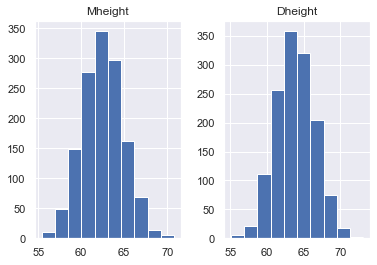

In [5]:
df.hist()
plt.show()

#### 3.1.2 Scatterplots
However if we want to visually examine the *relationship* between the two categorical variables we can use a scatterplot.

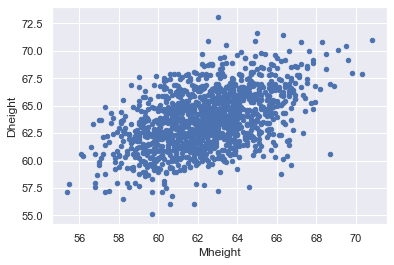

In [6]:
df.plot.scatter(x='Mheight', y='Dheight', c='b')
plt.show()

#### 3.1.3 Describing the Relationship between two Numerical Variables

#### What can we say about this relationship?

When visualizing the relationship between two numerical varibles there are four things that we should be ready to discuss.
1. **What is the direction of the relationship?**
    - For instance, this relationship is going up and to the right, therefore it is a positive relationship.
2. **What is the shape of the relationship?**
    - For instance, if we were to draw a "best fit" curve running through the points in this plot, it would be linear. Therefore this is a linear relationship.
3. **What is the strength of this relationship?**
    - For instance, the points in this relationship do not perfectly fall on this "best fit" curve that we would have drawn, so it is not a STRONG relationship. However, we do see some pattern to the relationship. So we can say that this is a moderate relationship.
4. **Are there any outliers in the data?**
    - If there are any points that fall far away from the main cloud of data, then we could classify this as an outlier. In this. However, this particular dataset does not seem to have any outliers.
    
    
#### 3.1.4 Scatterplot with a Best Fit Line

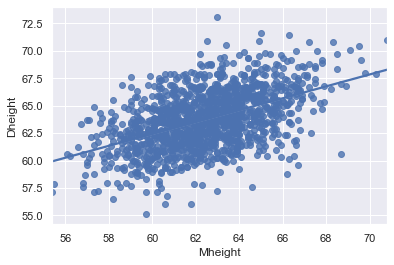

In [7]:
sns.regplot(x='Mheight', y='Dheight', data=df, ci=False)
plt.show()

### 3.2. Summary Statistics

#### See Unit 12 slides (section 3.2)
How do we *numerically* quantify the relationship between these two numerical variables?

#### 3.2.1 Covariance of Two Numerical Variables

Below is the **covariance matrix** of the two numerical variables.

The diagonal entries represent the **covariance between the mother height and daughter height** (3.005). The covariance matrix also gives the **variance for the mother heights** (5.5465) and the **variance for the daughter heights** (6.76).

Because the covariance is positive we can see that there is a positive relationship between the two numerical variables.

In [8]:
df.cov()

,Mheight,Dheight
Mheight,5.546511,3.004806
Dheight,3.004806,6.760274


In [9]:
cov=df.cov().iloc[0,1]
cov

3.0048059970887917

#### 3.2.2 Correlation Coefficient (R)
Below is the **correlation matrix** of the two numerical variables.

The diagonal entries represent the **correlation (R) between the mother height and daughter height** (0.49). 

Because the correlation is positive we can see that there is a positive relationship between the two numerical variables.

In [10]:
df.corr()

,Mheight,Dheight
Mheight,1.000000,0.490709
Dheight,0.490709,1.000000


In [11]:
rxy = df.corr().iloc[0,1]
rxy

0.49070936145753397

#### *Should* we use the correlation coefficient above to quantify the strength and direction of the relationship between mother and daughter heights?
<br/>
<br/>
<br/>
<br/>
<br/>

<br/>

<br/>

#### If so, interpret this correlation coefficient.
<br/>
<br/>
<br/>
<br/>
<br/>

<br/>

<br/>




## 4. Modeling: Ordinary Least Squares Regression - Simple Linear Regression -> Just One Slope

### 4.1. Finding a Best Fit Line

#### See unit 12 slides (section 4.1)

#### 4.1.1. Calculate the slope and intercept of a simple linear regression line "by hand."

In [12]:
df.mean()

Mheight    62.452800
Dheight    63.751055
dtype: float64

In [13]:
mean_x=df.mean().loc['Mheight']
print('Explanatory Variable Mean:',mean_x)

mean_y=df.mean().loc['Dheight']
print('Response Variable Mean:',mean_y)

Explanatory Variable Mean: 62.4528
Response Variable Mean: 63.75105454545446


In [14]:
df.std()

Mheight    2.355103
Dheight    2.600053
dtype: float64

In [15]:
std_x=df.std().loc['Mheight']
print('Explanatory Variable Mean:',std_x)

std_y=df.std().loc['Dheight']
print('Response Variable Mean:',std_y)

Explanatory Variable Mean: 2.355103276089619
Response Variable Mean: 2.6000526210817


In [16]:
print('Correlation (R): ',rxy)

Correlation (R):  0.49070936145753397


$\hat{\beta}_1 = R

In [17]:
slope=rxy*(std_y/std_x)
print('Slope:', slope)

Slope: 0.5417470114369786


In [18]:
intercept=mean_y-slope*mean_x
print('Intercept:', intercept)

Intercept: 29.91743678958312


#### 4.1.2. Finding the slope and intercept of a simple linear regression line with Python output.

#### Fitting a regression model and summarizing it

We import the formula api from the statsmodels library and then fit a simple linear regression model.

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

This step fits the model and creates an object containing the results.

In [20]:
results = smf.ols('Dheight ~ Mheight', data=df).fit()

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
Using the .summary() function, we can display an organized summary of the fitted model. The summary includes various quantitiative features of the model fit as well as a summary table for the model coefficient estimates, standard errors and coefficient t tests.

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.22e-84
Time:                        12:37:08   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Extracting individual pieces information from the results

If we want individual tables from the results summary we can access them as follows:

In [22]:
results.summary().tables[0]

Dep. Variable:,Dheight,R-squared:,0.241
Model:,OLS,Adj. R-squared:,0.240
Method:,Least Squares,F-statistic:,435.5
Date:,"Thu, 25 Mar 2021",Prob (F-statistic):,3.22e-84
Time:,12:37:08,Log-Likelihood:,-3075.0
No. Observations:,1375,AIC:,6154.
Df Residuals:,1373,BIC:,6164.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [23]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.9174,1.622,18.439,0.000,26.735,33.100
Mheight,0.5417,0.026,20.868,0.000,0.491,0.593


The following command gives a listing of all the the individual pieces of information we could extract from the ols results object:

In [24]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.22e-84
Time:                        12:37:08   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Use the table above to find the slope and intercept of the best fit line. Then use these to formulate your simple linear regression model.
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


### 4.2. Evaluating the Model Fit

#### See Unit 12 slides (section 4.2)

**Ex:** Use the model output to find the $R^2$ of the model.

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.22e-84
Time:                        12:37:08   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
results.rsquared

0.24079567742206165

#### What percent of total variability of the daughter heights is explained by the model (or mother heights)?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### What percent of total variability of the daughter heights is NOT explained by the model (or mother heights)?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## 5. Conducting Inference for the Population Slope(s) and Population Intercept of a Simple Linear Regression Line for the Population Data

#### See Unit 12 slides (section 5)

### 5.1. Properties of the Sampling Distribution of Sample Slopes

#### See Unit 12 slides (section 5.1)

### 5.2. Checking the Conditions for Population Slope/Coefficient Inference

#### See Unit 12 slides (section 5.2)

**Ex:** Check the conditions for conducting simple linear regression inference on the slope and intercept of our model that predicts daughter height with mother height.

#### 5.2.1. <u>Linearity Condition</u>

#### Is a linear model a good fit for the data?
In order for multiple linear regression model to be a good fit of the data as well as for accurate inferences to be made (using the methods we discussed above), the first condition that must be satisfied is that there must be a linear relationship between the explanatory variables and the response variable.

#### How to check condition 1 by plotting residuals versus fitted values.

In the analysis of the heights data, the directory of component methods for the OLS results includes 'resid' and 'fittedvalues' among many others.

In [28]:
results.fittedvalues

0       62.259733
1       61.447113
2       62.747306
3       62.801480
4       63.397402
          ...    
1370    67.352155
1371    65.130993
1372    65.835264
1373    68.273125
1374    64.047499
Length: 1375, dtype: float64

In [29]:
results.resid

0      -7.159733
1      -4.947113
2      -6.747306
3      -6.001480
4      -7.397402
          ...   
1370    2.747845
1371    6.469007
1372    5.564736
1373    2.726875
1374    9.052501
Length: 1375, dtype: float64

#### Fitted Values vs. Residuals Plot

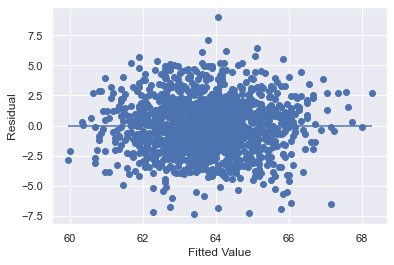

In [30]:
plt.scatter(results.fittedvalues, results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**Result for our data:** The points are roughly evenly distributed above and below the x-axis in the fitted values vs. residuals plot (for all ranges along the x-axis). Thus the linearity condition is met.

#### 5.2.2 <u>Constant Variance of Residuals Condition</u>

#### Needed for inference
In order for our multiple linear regression model to make accurate inferences (using the methods we discussed above), the next condition that must be satisfied is that the variance of the residuals must remain constant (for all fitted values.

To check this condition, we can use the same plot as the one used for checking the linearity condition.

#### Fitted Values vs. Residuals Plot

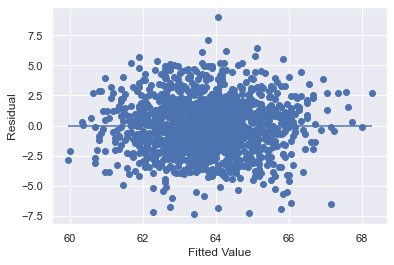

In [31]:
plt.scatter(results.fittedvalues, results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

#### Interpreting:
* The constant variance of the residuals condition is met if the y-axis ranges of the points remains constant as you move from right to left in fitted values vs. residuals plot.


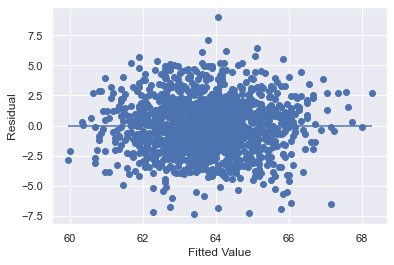

In [32]:
plt.scatter(results.fittedvalues, results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues))
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**Result for our data:** For the most part (except for on the edges) the y-axis ranges of the points in our fitted value vs. residuals plots stays around 10 (ie around [-5,5]). So the consant variance of residuals condition is mostly met.

#### 5.2.3 <u>Residuals are Normal Distributed (with Mean of 0)</u>

#### For inference
In order for our multiple linear regression model to make accurate inferences (using the methods we discussed above), the next condition that must be satisfied is that the residuals must be normally distributed and must have a mean of zero.

To check this condition, we can look at a histogram of the residuals.

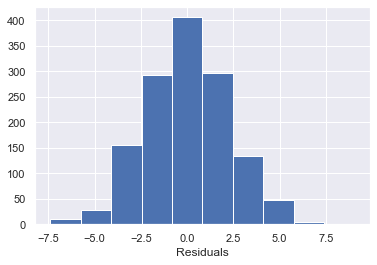

In [33]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

#### How to check condition 3 by plotting the histogram of the residuals.

Plot the histogram of the residuals.

#### Interpreting:
* We can assume that this condition is met if the shape of the histogram is roughly symmetric and unimodal and is centered at 0.


**Result for our data:** Our histogram of residuals is roughly symmetric, unimodal, and centered at 0. Therefore the condition in which the residuals are normally distributed with a mean of 0 is met.

#### 5.2.4. <u>Independence of Residuals</u>

At the very least, we verify that:
* the data is randomly sampled and
* the sample size n=1375<10% of all mother/daughter pairs.

Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent (for other reasons that you will discuss in later statistics classes).

## 5.3 Creating a $(1-\alpha)\cdot100$% Confidence Interval for a Population Slope

#### See Unit 12 slides (section 5.3)

**Ex:** Use the simple linear regression output table from Python to create a 95% confidence interval for the population slope.

In [34]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.9174,1.622,18.439,0.000,26.735,33.100
Mheight,0.5417,0.026,20.868,0.000,0.491,0.593



#### a.) What is the sample slope $\hat{\beta_1}$ for the "Mheight" explanatory variable?

<br/>
<br/>
<br/>
<br/>
<br/>

#### b.) What is the standard error $SD(\hat{\beta_1})$ for the slopes of the "Mheight" explanatory variable?

<br/>
<br/>
<br/>
<br/>
<br/>

#### C.) What is the critical value for a 95% confidence interval for one of these population slopes (or the population intercept)?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [35]:
len(df)

1375

In [36]:
from scipy.stats import t
#t.ppf(1-alpha/2, df=n-p-1)
#n=number of observations
#p=number of slopes in the regression equation (1 slope in this case... the one for MHeight)
critical_value=t.ppf(1-.05/2, df=1375-1-1)
print('Critical Value',critical_value)

Critical Value 1.9616932841053176


In [37]:
point_estimate=0.5417
print('Point Estimate (sample slope):', point_estimate)
standard_error=0.026
print('Standard Error (of sample slopes):', standard_error)

lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('95% Confidence Interval:', lower_bound, upper_bound)

Point Estimate (sample slope): 0.5417
Standard Error (of sample slopes): 0.026
95% Confidence Interval: 0.4906959746132617 0.5927040253867382


#### d.) Create a 95% confidence interval for $\beta_1$, the POPULATION SLOPE of of the "Mheight" explanatory variable?


$(\hat{\beta}_1-t^*_{n-p-1}SE_{\hat{\beta}_1}, \hat{\beta}_1+t^*_{n-p-1}SE_{\hat{\beta}_1})$

$(\hat{\beta}_1-t^*_{1375-1-1}SE_{\hat{\beta}_1}, \hat{\beta}_1+t^*_{1375-1-1}SE_{\hat{\beta}_1})$


$(0.5417-1.96 (0.026), 0.5417+1.96 (0.026))$

$(0.49, 0.59)$





#### e.) Interpret this confidence interval.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## 5.4. Conducting a Hypothesis Test for a Population Slope, Testing the Claim $H_A: \beta_i\neq 0$ with a p-value.

#### See Unit 12 (Section 5.4 slides)

**Ex:** We would like to test whether there is a linear relationship in the population of ALL mother and daughter heights.
Use the simple linear regression output table to answer the following questions.


#### 1.  Conduct Hypothesis Testing for $\beta_i$:
$H_0: \beta_i=0$

$H_A: \beta_i\neq0$.


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### 2. Make sure the conditions hold for this test.

We already checked the conditions for performing inference on $\beta_i$ above, and we found that they all hold.

(ie. the linearity condition, the constant variance of residuals condition, the normality of residuals (with mean of 0) condition, and we will assume that the condition for the independence of residuals condition is met as well).


#### 3. use the table to find the p-value for this test.



In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.22e-84
Time:                        12:37:09   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9174      1.622     18.439      0.000      26.735      33.100
Mheight        0.5417      0.026     20.868      0.000       0.491       0.593
==============================================================================
Omnibus:                        1.412   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.353
Skew:                           0.002   Prob(JB):                        0.508
Kurtosis:                       3.154   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### 4. Use the p-value to make a conclusion for these hypotheses.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### 5. What is the test statistic for this test?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#### 6. Calculate thie test statistic by hand.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>



In [39]:
test_stat=(.5417-0)/.026
print('Test Statistic', test_stat)

Test Statistic 20.834615384615383


#### 7. Calculate the p-value by hand (and using your t-distribution object in Python). 

In [40]:
from scipy.stats import t

#Sample size
n=1375
#Number of slopes in the regression (p=1 just mother height)
p=1

pvalue=2*(1-t.cdf(test_stat, df=n-p-1))
print('p-value:', pvalue)

p-value: 0.0


#### 8. Use your 95% confidence interval from the previous section to make a conclusion about your hypotheses.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## 6. Making a prediction with a simple linear regression

**Ex:** Use your simple linear regression equation to predict the height of a daughter whose mother is 66”. 

#### 6.1. First do this by hand.

We can extract the slope(s) and intercept of our regression equation by using the **.params** attribute.

In [41]:
results.params # estimated regression coefficients

Intercept    29.917437
Mheight       0.541747
dtype: float64

What is the daughter's predicted height if her mother's height is 66 inches? Looking at the output we would compute:
<br/>
<br/>
<br/>
<br/>
$
\hat{y}_{new} = 29.9174 + 0.5417 * (Mheight)
$
<br/>
<br/><br/>
$
\hat{y}_{new} = 29.9174 + 0.5417 * 66 = 65.6696
$

In [42]:
# manual calculation:
29.9174 + 0.5417*66

65.6696

In [43]:
# calculation by extracting parameter estimates:
sum(results.params * [1, 66])

65.67273954442385

#### 6.2 Make the prediction automatically in Python.

Statmodels has a method for performing this prediction and enhancing it with additionla information. We use the **.predict()** function. The argument "exog=" requires a dictionary list of the exogenous (explanatory) variables and their values.

In [44]:
results.predict(exog=dict(Mheight=66))

0    65.67274
dtype: float64

#### Verify the results that you got using both ways are the same.

#### 6.3 We can also use this function make multiple predictions at the same time.

What are the heights of daughter's with mother's whose heights are: 60", 68", and 70" respectively?

In [45]:
results.predict(exog=dict(Mheight=[60, 68, 70]))

0    62.422257
1    66.756234
2    67.839728
dtype: float64

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign